<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/exercicio_4_desenvolvimento_regional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disciplina :  CEA0004 - Desenvolvimento Regional - T01 (2025.2) /n

Aluna: Bárbara Junqueira dos Santos /n

Matricula: 20252001826 /n

Lista de exercício: 4/n

link do colab: https://colab.research.google.com/drive/1aGpNm-Tz1Qs8KdCUZEhDab8OZhoZ5paU#scrollTo=vJnKqQE8OYw6

1. Coleta de Dados da RAIS

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.style.use('default')
sns.set_palette("husl")

print("=== ATIVIDADE 4 - CÁLCULO DO QUOCIENTE LOCACIONAL (QL) ===\n")
print("Municipio São Paulo - UF: SP ano 2024")

=== ATIVIDADE 4 - CÁLCULO DO QUOCIENTE LOCACIONAL (QL) ===

Municipio São Paulo - UF: SP ano 2024


2. Carregar arquivo


In [77]:
uploaded = files.upload()
arquivo = list(uploaded.keys())[0]
df = pd.read_excel(arquivo)
print(f" Dados carregados: {df.shape[0]} subsetores, {df.shape[1]} colunas")

Saving dados_SP_SP.xlsx to dados_SP_SP (6).xlsx
 Dados carregados: 25 subsetores, 3 colunas


In [78]:
df = pd.read_excel(arquivo)
df.head()

,IBGE Subsetor,Municipio,Estado
0,Extrativa Mineral,1368,16688
1,Prod. Mineral Não Metálico,7219,110770
2,Indústria Metalúrgica,35259,258914
3,Indústria Mecânica,32917,279239
4,Elétrico e Comunic,16178,108455


3. Cálculo do Quociente Locacional (QL)

In [79]:

colunas = df.columns
df.columns = ['IBGE Subsetor', 'Municipio', 'Estado']

# Calcular QL
total_mun = df['Municipio'].sum()
total_est = df['Estado'].sum()

df['Part_Mun'] = (df['Municipio'] / total_mun) * 100
df['Part_Est'] = (df['Estado'] / total_est) * 100
df['QL'] = df['Part_Mun'] / df['Part_Est']

# Classificar
def classificar_ql(q):
    if q > 1.5: return "Especialização Forte"
    elif q > 1.2: return "Especialização Moderada"
    elif q > 1.0: return "Especialização Leve"
    elif q > 0.8: return "Equilíbrio"
    else: return "Desvantagem"

df['Classificacao'] = df['QL'].apply(classificar_ql)
df_ordenado = df.sort_values('QL', ascending=False)

4. Resultados

In [80]:
print("="*60)
for _, row in df_ordenado.iterrows():
    setor = row['IBGE Subsetor'][:40] + "..." if len(row['IBGE Subsetor']) > 43 else row['IBGE Subsetor']
    print(f"{setor:<43} {row['QL']:.3f} {row['Classificacao']}")

print("="*60)
print(f"QL Médio: {df['QL'].mean():.3f}")
print(f"Setores especializados (QL>1): {len(df[df['QL'] > 1])}")
print(f"Setores com desvantagem (QL<1): {len(df[df['QL'] < 1])}")

Instituição Financeira                      1.819 Especialização Forte
Adm Técnica Profissional                    1.471 Especialização Moderada
Médicos Odontológicos Vet                   1.257 Especialização Moderada
Construção Civil                            1.235 Especialização Moderada
Ensino                                      1.174 Especialização Leve
Aloj Comunic                                1.142 Especialização Leve
Administração Pública                       1.070 Especialização Leve
Comércio Atacadista                         1.059 Especialização Leve
Serviço Utilidade Pública                   0.987 Equilíbrio
Transporte e Comunicações                   0.857 Equilíbrio
Comércio Varejista                          0.837 Equilíbrio
Indústria Têxtil                            0.780 Desvantagem
Papel e Gráf                                0.687 Desvantagem
Borracha, Fumo, Couros                      0.525 Desvantagem
Alimentos e Bebidas                         0.493 Desvanta

5. Visualização dos Resultados

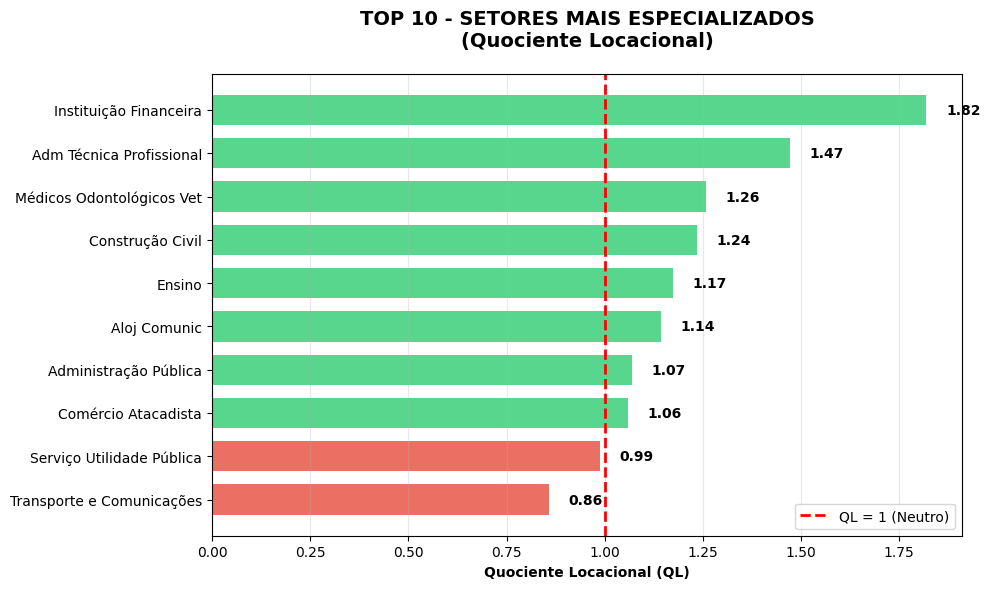

In [81]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

# =============================================================================
# Gráfico 1: Top 10 QL - VERSÃO MELHORADA
# =============================================================================
plt.figure(figsize=(10, 6))
top10 = df_ordenado.head(10)

# Criar barras horizontais
bars = plt.barh(
    range(len(top10)),
    top10['QL'],
    color=['#2ecc71' if x > 1 else '#e74c3c' for x in top10['QL']],
    alpha=0.8,
    height=0.7
)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontweight='bold')

plt.yticks(
    range(len(top10)),
    [s[:30] + "..." if len(s) > 33 else s for s in top10['IBGE Subsetor']]
)
plt.xlabel('Quociente Locacional (QL)', fontweight='bold')
plt.title('TOP 10 - SETORES MAIS ESPECIALIZADOS\n(Quociente Locacional)',
          fontsize=14, fontweight='bold', pad=20)
plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label='QL = 1 (Neutro)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  # Maior QL no topo
plt.tight_layout()
plt.show()



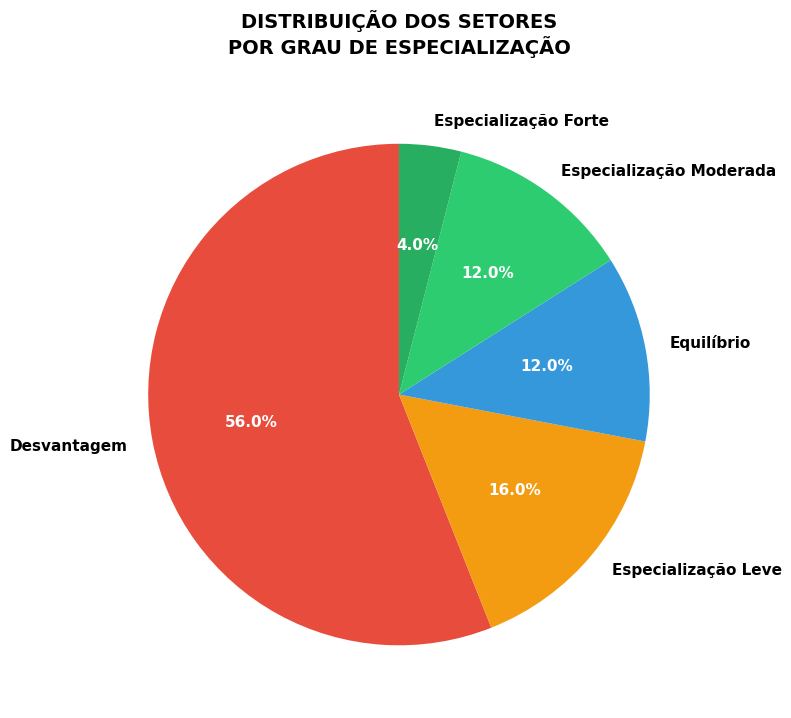

In [82]:
# =============================================================================
# Gráfico 2: Distribuição por Classificação - VERSÃO MELHORADA
# =============================================================================
plt.figure(figsize=(8, 8))

# Definir cores para cada classificação
cores_classificacao = {
    'Especialização Forte': '#27ae60',
    'Especialização Moderada': '#2ecc71',
    'Especialização Leve': '#f39c12',
    'Equilíbrio': '#3498db',
    'Desvantagem': '#e74c3c'
}

# Criar dados para o pie chart
class_counts = df['Classificacao'].value_counts()
cores = [cores_classificacao[cat] for cat in class_counts.index]

wedges, texts, autotexts = plt.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

# Melhorar aparência dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('DISTRIBUIÇÃO DOS SETORES\nPOR GRAU DE ESPECIALIZAÇÃO',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



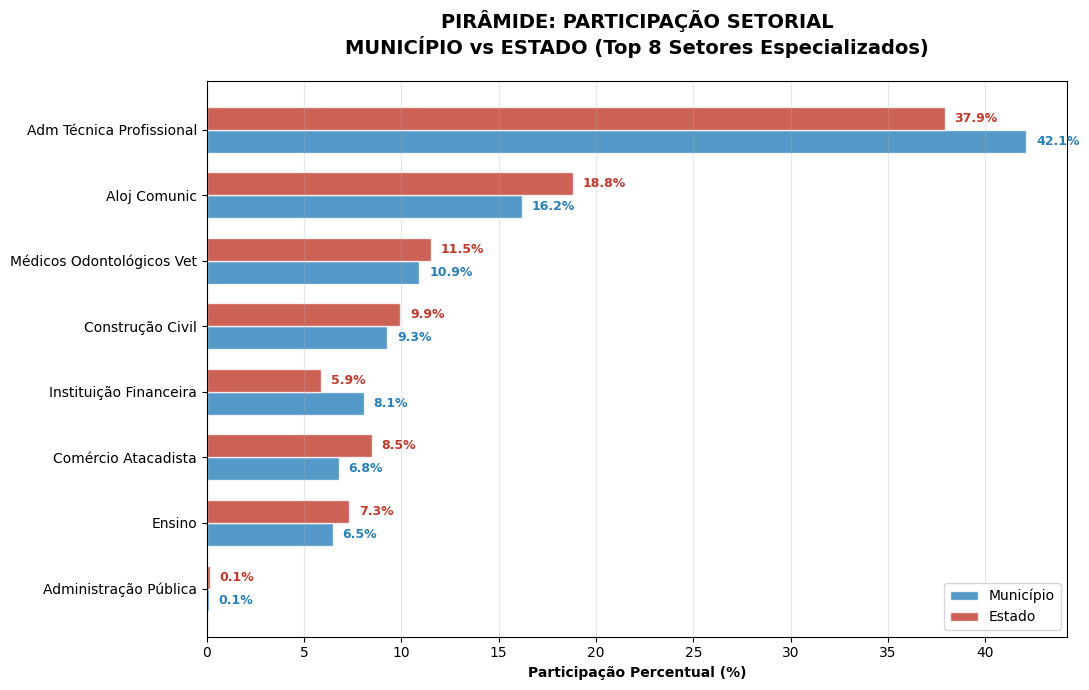

In [83]:
# =============================================================================
# Gráfico 3: Pirâmide de Participação - VERSÃO MELHORADA
# =============================================================================
plt.figure(figsize=(11, 7))
top8 = df_ordenado.head(8).copy()

# Normalização para porcentagem
top8['Mun_Perc'] = (top8['Municipio'] / top8['Municipio'].sum()) * 100
top8['Est_Perc'] = (top8['Estado'] / top8['Estado'].sum()) * 100

# Ordenação crescente para pirâmide
top8 = top8.sort_values('Mun_Perc', ascending=True)

y_pos = np.arange(len(top8))
largura = 0.35

# Barras municipais
bars_mun = plt.barh(y_pos - largura/2, top8['Mun_Perc'], largura,
                   label='Município', color='#2980b9', alpha=0.8, edgecolor='white')

# Barras estaduais
bars_est = plt.barh(y_pos + largura/2, top8['Est_Perc'], largura,
                   label='Estado', color='#c0392b', alpha=0.8, edgecolor='white')

# Adicionar valores nas barras
for i, (bar_mun, bar_est) in enumerate(zip(bars_mun, bars_est)):
    # Valor município
    plt.text(bar_mun.get_width() + 0.5, bar_mun.get_y() + bar_mun.get_height()/2,
             f'{bar_mun.get_width():.1f}%', ha='left', va='center',
             fontweight='bold', color='#2980b9', fontsize=9)
    # Valor estado
    plt.text(bar_est.get_width() + 0.5, bar_est.get_y() + bar_est.get_height()/2,
             f'{bar_est.get_width():.1f}%', ha='left', va='center',
             fontweight='bold', color='#c0392b', fontsize=9)

plt.yticks(y_pos, [s[:25] + "..." if len(s) > 28 else s for s in top8['IBGE Subsetor']])
plt.xlabel('Participação Percentual (%)', fontweight='bold')
plt.title('PIRÂMIDE: PARTICIPAÇÃO SETORIAL\nMUNICÍPIO vs ESTADO (Top 8 Setores Especializados)',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

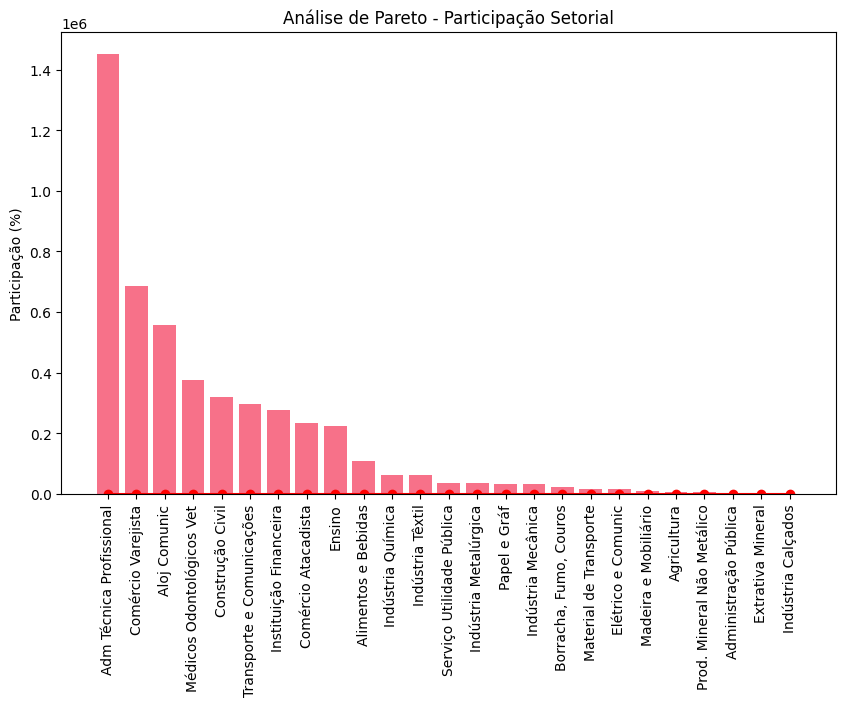

In [84]:
# =============================================================================
# Gráfico 4: Análise de Pareto - VERSÃO COM LABELS INCLINADAS
# =============================================================================
df_sorted = df.sort_values('Municipio', ascending=False)
df_sorted['acumulado'] = df_sorted['Municipio'].cumsum() / df_sorted['Municipio'].sum() * 100
plt.figure(figsize=(10,6))
plt.bar(df_sorted['IBGE Subsetor'], df_sorted['Municipio'])
plt.plot(df_sorted['IBGE Subsetor'], df_sorted['acumulado'], color='red', marker='o')
plt.xticks(rotation=90)
plt.title('Análise de Pareto - Participação Setorial')
plt.ylabel('Participação (%)')
plt.show()

6. Análise e interpretação dos resultados

In [85]:
print("\n" + "="*70)
print("ANÁLISE ESPECÍFICA DOS RESULTADOS")
print("="*70)

# Coletar métricas para análise
ql_medio = df['QL'].mean()
setores_especializados = df[df['QL'] > 1]
setores_fortes = df[df['QL'] > 1.5]
top3_especializados = df_ordenado.head(3)

print(f"\n ANÁLISE DO PERFIL ECONÔMICO:")

print(f"""\nO município de São Paulo apresenta um Quociente Locacional médio de {ql_medio:.2f},
indicando uma {'vantagem competitiva' if ql_medio > 1 else 'desvantagem competitiva'}
em relação ao estado como um todo. Dos {len(df)} setores analisados,
{len(setores_especializados)} ({len(setores_especializados)/len(df)*100:.1f}%)
possuem especialização (QL > 1), enquanto {len(setores_fortes)} setores
apresentam especialização forte (QL > 1.5), demonstrando clusters setoriais
bem definidos na economia local.""")

print(f"""\n VANTAGENS COMPARATIVAS ESTRUTURAIS:

Os setores de {top3_especializados.iloc[0]['IBGE Subsetor']} (QL={top3_especializados.iloc[0]['QL']:.2f}),
{top3_especializados.iloc[1]['IBGE Subsetor']} (QL={top3_especializados.iloc[1]['QL']:.2f}) e
{top3_especializados.iloc[2]['IBGE Subsetor']} (QL={top3_especializados.iloc[2]['QL']:.2f})
emergem como as principais vocações econômicas do município. Estes setores
apresentam participação significativamente maior na estrutura produtiva local
em comparação com sua participação na economia estadual, sugerindo vantagens
comparativas que podem ser exploradas para políticas de desenvolvimento
econômico e atração de investimentos.""")

print(f"""\n CONSIDERAÇÕES PARA POLÍTICAS PÚBLICAS:

A análise do QL revela oportunidades estratégicas para o planejamento
econômico municipal. Os setores com especialização forte representam
potenciais polos de desenvolvimento que podem ser fortalecidos através
de políticas setoriais específicas. Por outro lado, os setores com
QL abaixo de 1 indicam dependência de outras regiões para determinados
bens e serviços, sugerindo oportunidades para políticas de substituição
de importações ou diversificação da base econômica local.""")



ANÁLISE ESPECÍFICA DOS RESULTADOS

 ANÁLISE DO PERFIL ECONÔMICO:

O município de São Paulo apresenta um Quociente Locacional médio de 0.72, 
indicando uma desvantagem competitiva 
em relação ao estado como um todo. Dos 25 setores analisados, 
8 (32.0%) 
possuem especialização (QL > 1), enquanto 1 setores 
apresentam especialização forte (QL > 1.5), demonstrando clusters setoriais 
bem definidos na economia local.

 VANTAGENS COMPARATIVAS ESTRUTURAIS:

Os setores de Instituição Financeira (QL=1.82), 
Adm Técnica Profissional (QL=1.47) e 
Médicos Odontológicos Vet (QL=1.26) 
emergem como as principais vocações econômicas do município. Estes setores 
apresentam participação significativamente maior na estrutura produtiva local 
em comparação com sua participação na economia estadual, sugerindo vantagens 
comparativas que podem ser exploradas para políticas de desenvolvimento 
econômico e atração de investimentos.

 CONSIDERAÇÕES PARA POLÍTICAS PÚBLICAS:

A análise do QL revela oportunida